## **FLOWER RECOGNITION**

### Importing necessary libraries

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Activation
import keras.backend as K
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from IPython.display import Image, display
#from keras_tuner import RandomSearch
#from keras_tuner.engine.hyperparameters import HyperParameters
from tqdm import tqdm
#import cv2
import random as rn
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

**displaying flower images from each class**

daisy


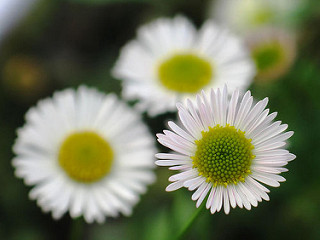



dandelion


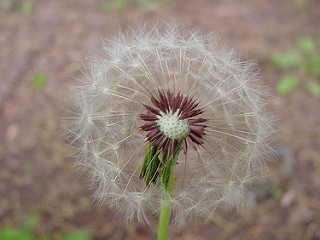



rose


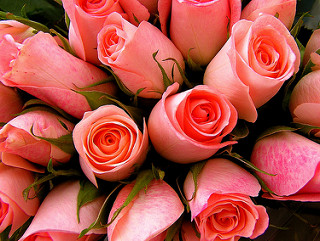



sunflower


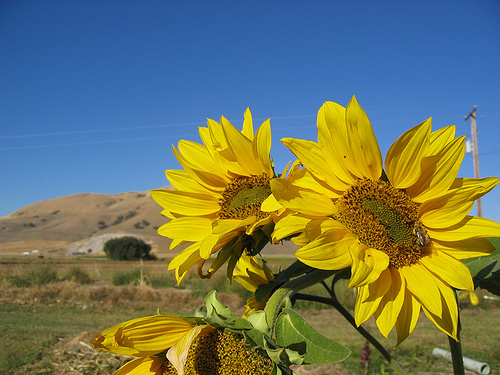



tulip


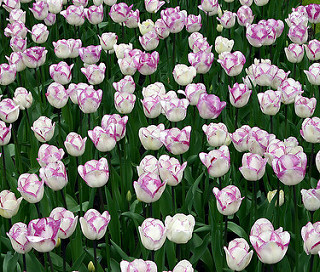

In [8]:
listOfImageNames = [r'D:\Divya Dharshini\Praxis\Term 3\flower\flowers5\daisy\5794839_200acd910c_n.jpg',
                    r'D:\Divya Dharshini\Praxis\Term 3\flower\flowers5\dandelion\11405573_24a8a838cc_n.jpg',
                    r'D:\Divya Dharshini\Praxis\Term 3\flower\flowers5\rose\118974357_0faa23cce9_n.jpg',
                    r'D:\Divya Dharshini\Praxis\Term 3\flower\flowers5\sunflower\45045005_57354ee844.jpg',
                    r'D:\Divya Dharshini\Praxis\Term 3\flower\flowers5\tulip\11746367_d23a35b085_n.jpg']
labels = ['daisy','dandelion','rose','sunflower','tulip']
for i,imageName in enumerate(listOfImageNames):
    print(labels[i])
    display(Image(filename=imageName))
    print("\n")

In [ ]:
### **Data Augmentation**

In [9]:
datagen = ImageDataGenerator(
    rescale = 1./255,#pixels Neural networks typically perform better when input data is normalized, so this scaling helps the model train more efficiently.
    shear_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    validation_split=0.2)

### **creating a training and testing data**

In [12]:
train_data =  datagen.flow_from_directory(r"D:\Divya Dharshini\Praxis\Term 3\flower\flowers5",
        target_size=(150,150),#Resizes all images to 150x150 pixels.
        batch_size=32,#Specifies the number of images to be processed in each batch during training.
        subset = 'training',
        class_mode='categorical')

test_data =  datagen.flow_from_directory(r"D:\Divya Dharshini\Praxis\Term 3\flower\flowers5",
        target_size=(150,150),
        batch_size=32,
        subset = 'validation',
        class_mode='categorical')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


**spliting above data into, data and labels**

In [13]:
train_labels = []
traindata = []
for i in range(0,109): #109 batches of data will be processed.
    train_labels.extend(np.array(train_data[i][1]))
    traindata.extend(np.array(train_data[i][0]))

#train_labels will hold the one-hot encoded labels for each image, and traindata will hold the actual image data (pixel values).
    
test_labels=[]
testdata = []
for i in range(0,27):#Loops through the batches of test data, which are generated in a similar way to the training data but on the validation split.
    test_labels.extend(np.array(test_data[i][1]))
    testdata.extend(np.array(test_data[i][0]))

In [14]:
np.asarray(train_labels).shape, np.asarray(test_labels).shape

((3457, 5), (860, 5))

### **Visualizing random images from our training data**

**transforming onhotencoded labels into actual labels name**

In [15]:
lbls = []
for i in train_labels:
    if all(i == [0.,0.,0.,0.,1.]):
        lbls.append('tulip')
    elif all(i == [0.,0.,0.,1.,0.]):
        lbls.append('sunflower')
    elif all(i == [0.,0.,1.,0.,0.]):
        lbls.append('rose')
    elif all(i == [0.,1.,0.,0.,0.]):
        lbls.append('dendelion')
    elif all(i == [1.,0.,0.,0.,0.]):
        lbls.append('daisy')

**plotting the images**

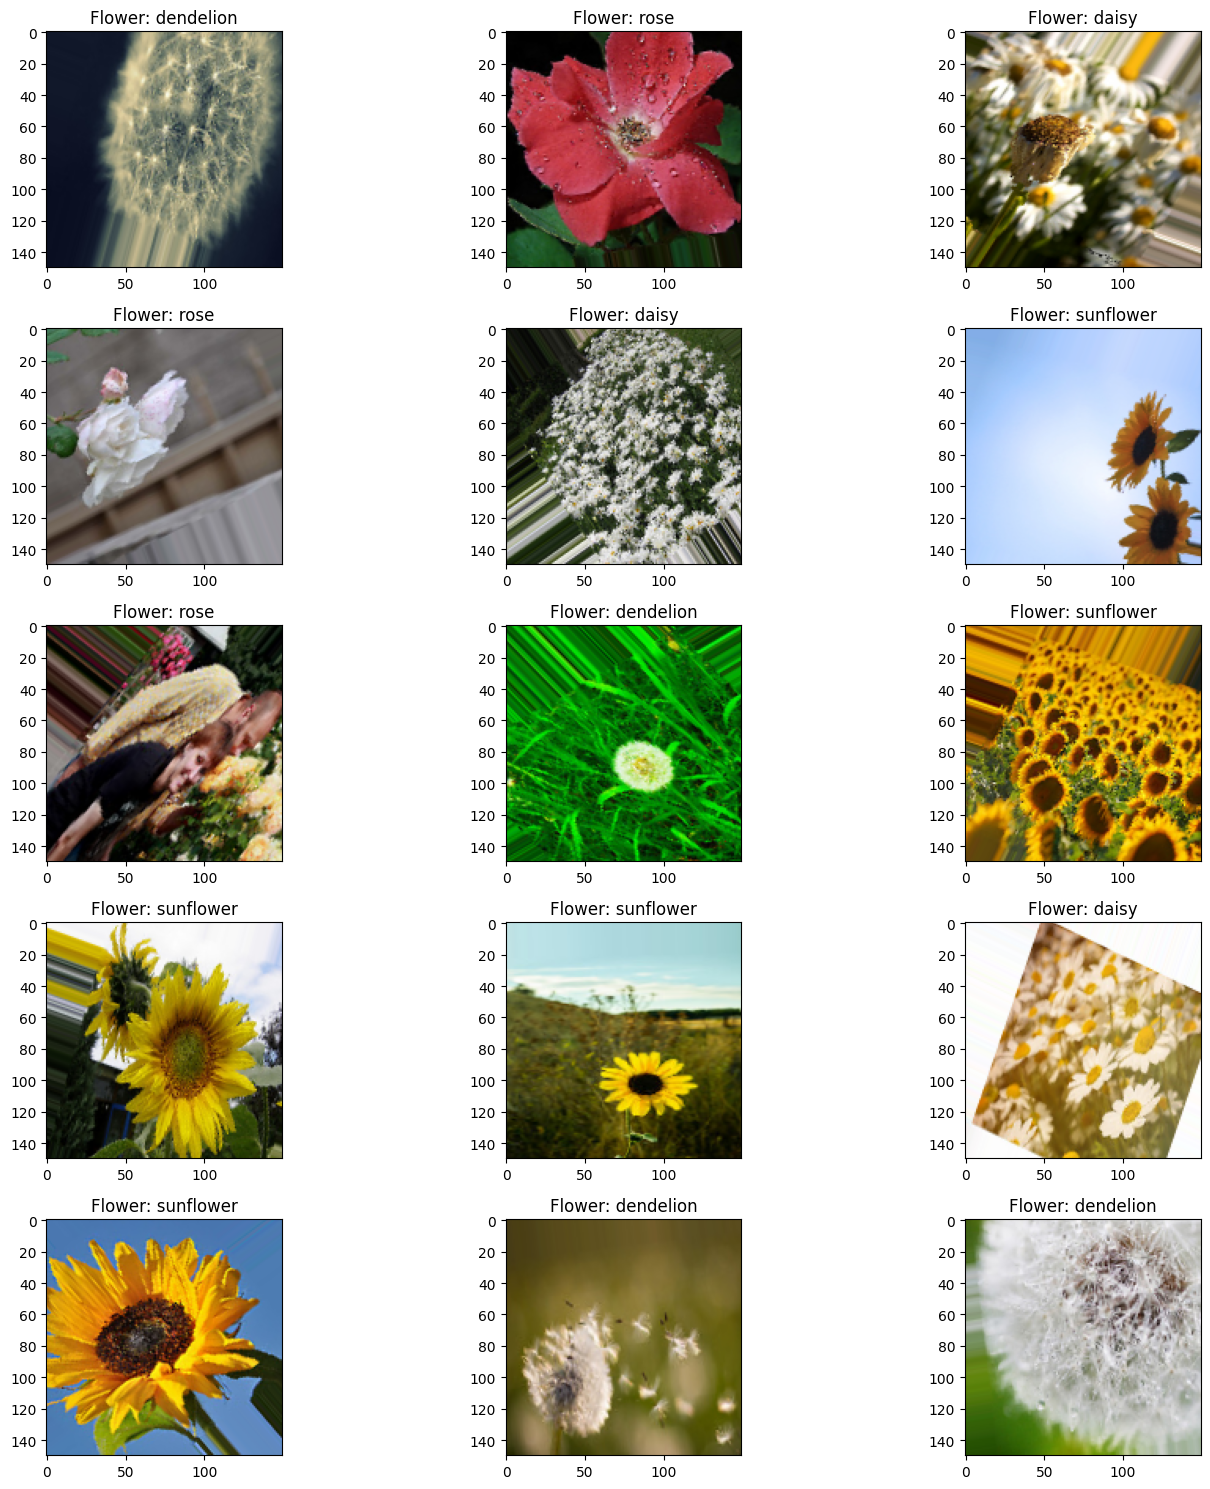

In [16]:
fig,ax=plt.subplots(5,3)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (3):
        l=rn.randint(0,len(train_labels))
        ax[i,j].imshow(traindata[l])
        ax[i,j].set_title('Flower: '+lbls[l])
        
plt.tight_layout()

#This will be used to display 15 random flower images from the dataset, with one image per subplot.


**converting list into array**

In [17]:
traindata = np.array(traindata)
testdata = np.array(testdata)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [29]:
traindata.shape
testdata.shape
train_labels
test_labels

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

## **Buliding Model**

In [19]:
K.clear_session()
model = Sequential()

# Clears the backend session, resetting the state of the neural network. 
# This is useful when you are creating multiple models in the same environment to avoid memory clutter and any influence of old models.

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# pool_size=(2, 2): The max-pooling layer will take 
#  blocks from the input and output the maximum value from each block, effectively reducing the size of the feature map by half in each dimension.

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# strides of (2, 2).
# Why it matters: Reduces the size of the feature maps further, helping reduce computation and preventing overfitting.

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Adds a third convolutional layer with 96 filters, continuing to increase the number of filters to extract more complex features.
# Why it matters: More filters capture more patterns and features as the model goes deepe

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

# Flattens the 3D feature maps into a 1D vector to prepare it for the fully connected (dense) layers.


model.add(Dense(512)) #Adds a fully connected (dense) layer with 512 units.
model.add(Activation('relu'))# Applies the ReLU activation function for non-linearity, helping the model learn complex patter
model.add(Dense(5, activation='softmax'))  # Adjust the number of output units based on your classification task
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# optimizer='adam': Adam optimizer is used, which is efficient and commonly used for deep learning tasks.

model.summary()

C:\Users\Divyadharshini\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7776)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,981,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

## Layers and Parameters:

### Convolutional Layers:
First Layer: Applies 32 filters to your images, creating feature maps. It has around 2,432 parameters to learn.
Second Layer: Uses 64 filters to detect more complex features from the previous layer’s output, with about 18,496 parameters.
Third Layer: Adds 96 filters to capture even more details, having 55,392 parameters.
Fourth Layer: Another 96 filters to further refine the features, with 83,040 parameters.

### Pooling Layers:
These layers reduce the size of the feature maps (by taking the maximum value in a region) but don't have any trainable parameters.

### Flatten Layer:
Converts the 3D feature maps into a 1D vector of 7,776 values, preparing it for the dense (fully connected) layers.

### Dense Layers:
First Dense Layer: Connects every feature from the flatten layer to 512 neurons, with 3,981,824 parameters. This layer helps the model learn complex patterns.
Output Dense Layer: Has 5 neurons, one for each class in your classification task, with 2,565 parameters. This layer makes the final classification decision.
### Overall:
Total Parameters: 4,143,749
All Parameters are Trainable: The model learns from these parameters during training.

## Fitting on the Training set and making predcitons on the Validation set

In [21]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Imports the Adam optimizer, which will be used for compiling the model.
# Why it matters: The Adam optimizer combines the benefits of two other optimizers (AdaGrad and RMSProp) 
# and is a popular choice in deep learning due to its efficiency and low memory requirement.

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
hist = model.fit(
    train_data,
    epochs=21,
    validation_data=test_data,
    callbacks=[early_stopping]
)

Epoch 1/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 90s 814ms/step - accuracy: 0.5670 - loss: 1.0932 - val_accuracy: 0.5488 - val_loss: 1.0522
Epoch 2/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 85s 759ms/step - accuracy: 0.6114 - loss: 0.9831 - val_accuracy: 0.6128 - val_loss: 1.0306
Epoch 3/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 79s 702ms/step - accuracy: 0.6497 - loss: 0.9201 - val_accuracy: 0.6209 - val_loss: 0.9473
Epoch 4/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 98s 874ms/step - accuracy: 0.6500 - loss: 0.8804 - val_accuracy: 0.6640 - val_loss: 0.9085
Epoch 5/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.6564 - loss: 0.8581 - val_accuracy: 0.6616 - val_loss: 0.8731
Epoch 6/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 111s 977ms/step - accuracy: 0.6673 - loss: 0.8521 - val_accuracy: 0.6593 - val_loss: 0.8661
Epoch 7/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 112s 999ms/step - accuracy: 0.6944 - loss: 0.8105 - val_accuracy: 0.6163 - val_loss: 0.9701
Epoch 8/21
109/109 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.6724 - loss: 0.8

In [24]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 610ms/step - accuracy: 0.7771 - loss: 0.6593
Test Loss: 0.65065598487854
Test Accuracy: 0.7744185924530029


## Evaluating the Model Performance

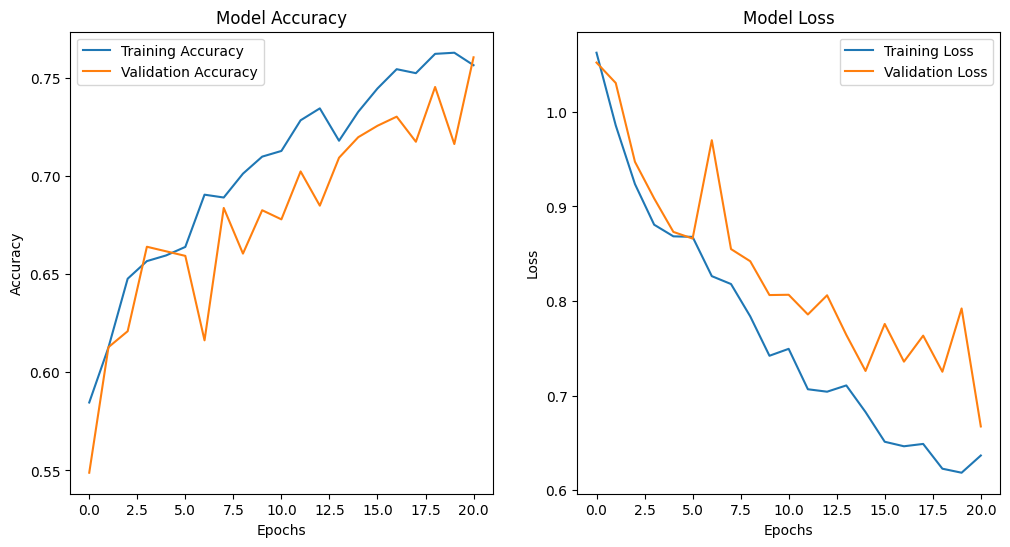

In [25]:
history = hist.history
# Plot accuracy and loss
plt.figure(figsize=(12, 6))
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Measures the error between predictions and actual values. Lower loss means better performance.

## Visualizing Predictons on the Validation Set

In [26]:
pred = model.predict(test_data)
print("Predicted Probabilities -\n", pred[:4])

pred_classes = np.argmax(pred, axis=1)
print("\nPredicted Class [Highest Prob] -", pred_classes[:4])


27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 621ms/step
Predicted Probabilities -
 [[4.7159344e-02 9.1892147e-01 2.4338417e-02 2.9211796e-03 6.6595334e-03]
 [2.7303767e-01 7.0565894e-02 4.1506997e-01 1.0921745e-02 2.3040470e-01]
 [1.3574463e-02 8.6078988e-03 3.6528137e-01 1.9448827e-04 6.1234176e-01]
 [2.8899258e-03 9.3971605e-05 8.3682612e-02 8.0441208e-07 9.1333276e-01]]

Predicted Class [Highest Prob] - [1 2 4 4]
